In [1]:
#!/usr/bin/env python

In [2]:
import os
import sys
if os.path.exists('/home/chieh/code/wPlotLib'):
	sys.path.insert(0,'/home/chieh/code/wPlotLib')
if os.path.exists('/home/chieh/code/wuML'):
	sys.path.insert(0,'/home/chieh/code/wuML')

In [3]:
import wuml
import numpy as np
import torch
import wplotlib

Examples of both "with" and "without" batch normalization<br>
The idea of training a neural network boils down to 3 steps<br>
	1. Define a network structure<br>
		Example: This is a 3 layer network with 100 node width<br>
			networkStructure=[(100,'relu'),(100,'relu'),(1,'none')]<br>
			Potential Activation Functions are: softmax, relu, tanh, sigmoid, none<br>
	2. Define a cost function<br>
	3. Call train()

In [4]:
data = wuml.wData(xpath='../../data/regress.csv', ypath='../../data/regress_label.csv', batch_size=20, label_type='continuous')
def costFunction(x, y, ŷ, ind):
	return torch.sum((y- ŷ) ** 2)	

----------------------------------------------<br>
Create basic network and train

In [5]:
bNet = wuml.basicNetwork(costFunction, data, networkStructure=[(30,'relu'),(50,'relu'),(1,'none')], max_epoch=500, learning_rate=0.001)
bNet.train(print_status=True)
Ŷ = bNet(data, output_type='ndarray')		#Takes Numpy array or Tensor as input and outputs a Tensor

	epoch: 500, Avg Loss: 4.7082, Learning Rate: 0.00100000

Note that we will save this network for later use, check load_use_network.py file 

In [6]:
wuml.save_torch_network(bNet, './basicRegressionNet.pk')

Check out our predictions

In [7]:
SR = wuml.summarize_regression_result(data.Y, Ŷ)
SR.true_vs_predict(print_out=True)

,y,ŷ,Δy
0,1.1,1.117,0.017
1,1.1,1.607,0.507
2,2.2,1.607,0.593
3,1.0,2.152,1.152
4,2.0,2.152,0.152
5,3.0,2.152,0.848
6,2.0,2.900,0.900
7,3.0,2.900,0.100
8,4.0,2.900,1.100


     y      ŷ     Δy
0  1.1  1.117  0.017
1  1.1  1.607  0.507
2  2.2  1.607  0.593
3  1.0  2.152  1.152
4  2.0  2.152  0.152
5  3.0  2.152  0.848
6  2.0  2.900  0.900
7  3.0  2.900  0.100
8  4.0  2.900  1.100

Draw the regression line

In [8]:
newX = np.expand_dims(np.arange(0,5,0.1),1)
Ŷline = bNet(newX, output_type='ndarray')		#Takes Numpy array or Tensor as input and outputs a Tensor

plot the results out

In [9]:
splot = wplotlib.scatter(data.X, data.Y, marker='o', show=False, subplot=121)
lp = wplotlib.lines(newX, Ŷline, title_font=11, title='Without Batch Normalization', xlim=[0,5], ylim=[0,5], show=False)	# show must be false if it is a subplot

----------------------------------------------<br>
Create network with batch normalization and train		<br>
For bn layers, ('bn', False), the 2nd boolean term sets if we use γ,β terms or not

In [10]:
bNet = wuml.basicNetwork(costFunction, data, networkStructure=[(30,'relu'),('bn', True), (50,'relu'),('bn', True),(1,'none')], max_epoch=50, learning_rate=0.001)
bNet.train(print_status=True)
Ŷ = bNet(data, output_type='ndarray')		#Takes Numpy array or Tensor as input and outputs a Tensor

	epoch: 50, Avg Loss: 35.0672, Learning Rate: 0.00100000

Check out our predictions

In [11]:
SR = wuml.summarize_regression_result(data.Y, Ŷ)
wuml.jupyter_print(SR.true_vs_predict(print_out=False))

,y,ŷ,Δy
0,1.1,-0.776,1.876
1,1.1,-0.167,1.267
2,2.2,-0.167,2.367
3,1.0,0.161,0.839
4,2.0,0.161,1.839
5,3.0,0.161,2.839
6,2.0,1.182,0.818
7,3.0,1.182,1.818
8,4.0,1.182,2.818


Draw the regression line

In [12]:
newX_bn = np.expand_dims(np.arange(0,5,0.1),1)
bNet.eval()		# if using BN you should set setting to eval before evaluating test samples
Ŷline_bn = bNet(newX_bn, output_type='ndarray')		#Takes Numpy array or Tensor as input and outputs a Tensor

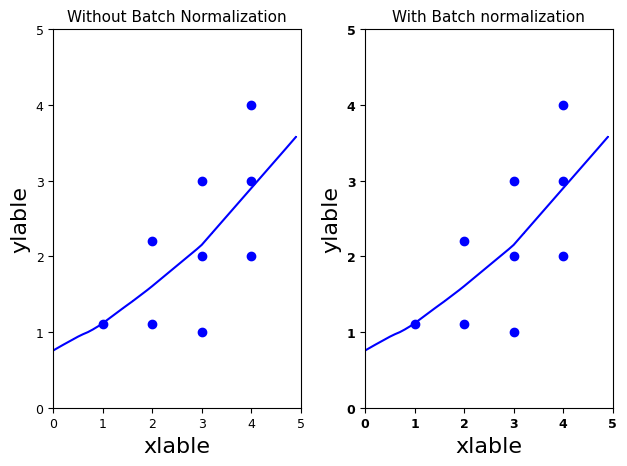

In [13]:
splot = wplotlib.scatter(data.X, data.Y, marker='o', show=False, subplot=122)
lp = wplotlib.lines(newX, Ŷline, title_font=11, title='With Batch normalization', xlim=[0,5], ylim=[0,5], )	